In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3
import sqlalchemy

In [8]:
engine = sqlalchemy.create_engine('sqlite:///JobData.db')

jobs = pd.read_sql('Select * FROM Jobs', engine, index_col='id')

jobs_salaries = pd.read_sql(""" Select
t1.id, t1.job_title, t1.company, t1.location, t2.salary_type, t2.salary_period, t2.expected, t2.floor, t2.ceiling 
FROM Jobs t1 INNER JOIN Salaries t2 ON t1.id = t2.id""", 
engine, index_col='id')

jobs_salaries_keywords = pd.read_sql(""" Select 
t1.id, t1.job_title, t1.company, t1.location, t2.salary_type, t2.salary_period, t2.expected, t2.floor, t2.ceiling, t3.keyword 
FROM Jobs t1 INNER JOIN Salaries t2 ON t1.id = t2.id LEFT JOIN KeywordRef t3 ON t3.id = t1.id""", 
engine, index_col=['id', 'keyword'])


In [9]:
jobs.head()

,job_title,company,location,rating_provided,rating,salary_provided,weblink,date_recorded,location_model,jurisdiction,city,country
id,,,,,,,,,,,,
cdc658d9990a63fc,Data Analyst (Banking Projects) - up to $62.00...,CorGTA Inc.,"Hybrid remote in Toronto, ON",n,NaN,y,https://ca.indeed.com/viewjob?jk=cdc658d9990a63fc,2023-11-17,Hybrid remote,ON,Toronto,Canada
cc8c9dc11f3c271f,"Business Analyst (Hybrid: North York, ON) - Re...",Enbridge Contingent Talent Community,"Hybrid remote in North York, ON",n,NaN,n,https://ca.indeed.com/viewjob?jk=cc8c9dc11f3c271f,2023-11-17,Hybrid remote,ON,North York,Canada
79507b61bd95323f,Pricing Analyst (FS/Tech/Furn),Staples Canada,"Mississauga, ON",n,NaN,n,https://ca.indeed.com/viewjob?jk=79507b61bd95323f,2023-11-17,Not Specified,ON,Mississauga,Canada
fb2e1282f0ec6e8e,Configuration Specialist/Functional Analyst,Procom,Remote in Ontario,n,NaN,n,https://ca.indeed.com/viewjob?jk=fb2e1282f0ec6e8e,2023-11-17,Remote,ON,Not Specified,Canada
1079d92e140e0d7f,Data Visualization Engineer,Motorola Solutions,"Remote in Markham, ON",n,NaN,y,https://ca.indeed.com/viewjob?jk=1079d92e140e0d7f,2023-11-17,Remote,ON,Markham,Canada


In [10]:
#Aside from the rating column, the data seems clean and effectively populated. Rating's are null if not provided from job which indicates rating is sparely populated. 
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1744 entries, cdc658d9990a63fc to 19fded9b00c6806e
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_title        1744 non-null   object 
 1   company          1744 non-null   object 
 2   location         1744 non-null   object 
 3   rating_provided  1744 non-null   object 
 4   rating           6 non-null      float64
 5   salary_provided  1744 non-null   object 
 6   weblink          1744 non-null   object 
 7   date_recorded    1744 non-null   object 
 8   location_model   1744 non-null   object 
 9   jurisdiction     1744 non-null   object 
 10  city             1744 non-null   object 
 11  country          1744 non-null   object 
dtypes: float64(1), object(11)
memory usage: 177.1+ KB


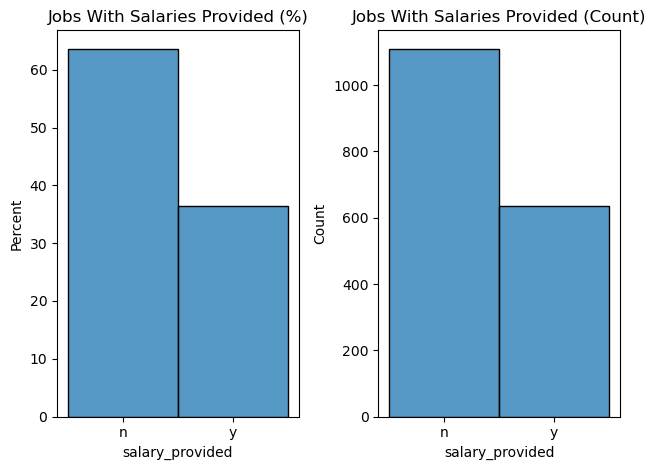

In [11]:
fig, axes = plt.subplots(1,2)

sns.histplot(data = jobs.sort_values(by = 'salary_provided'), x = 'salary_provided', stat = 'percent', ax=axes[0])
axes[0].set_title('Jobs With Salaries Provided (%)')

sns.histplot(data = jobs.sort_values(by = 'salary_provided'), x = 'salary_provided', ax=axes[1])
axes[1].set_title('Jobs With Salaries Provided (Count)')

plt.tight_layout()

plt.show()

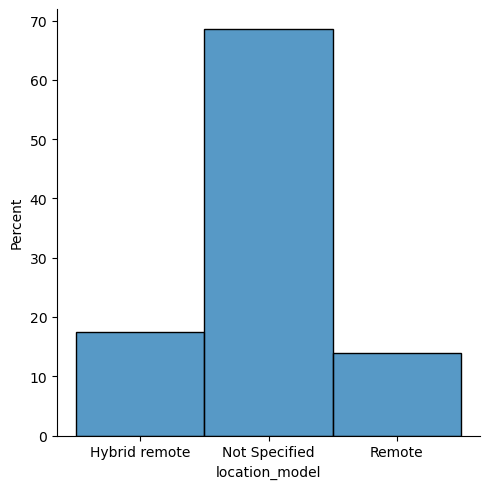

In [12]:
sns.displot(data = jobs, x = 'location_model', stat = 'percent')

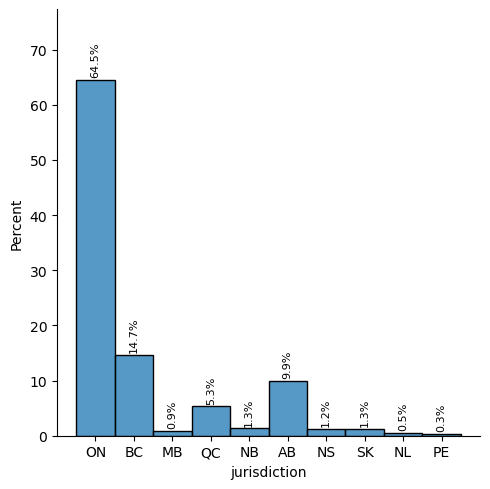

In [13]:
fg = sns.displot(data = jobs[jobs['jurisdiction'] != 'Not Specified'], x = 'jurisdiction', stat = 'percent')

for ax in fg.axes.ravel():
    for c in ax.containers:
        labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)
    
    ax.margins(y=0.2)

plt.show()


In [14]:
jobs_jurisdiction_grouped = pd.DataFrame(jobs.groupby('jurisdiction').size(), columns = ['job_count'])
jobs_jurisdiction_grouped['job_count_perc'] = jobs_jurisdiction_grouped['job_count'] / jobs_jurisdiction_grouped['job_count'].sum() * 100

In [15]:
jobs_jurisdiction_grouped = jobs_jurisdiction_grouped[jobs_jurisdiction_grouped.index != 'Not Specified'].sort_values(by='job_count', ascending=False)

In [16]:
pop = pd.read_csv('Canada Population.csv', thousands=',', index_col = 'geography')

pop['population_perc'] = pop['population']/pop['population'].sum()*100

In [17]:
population_merged = pd.merge(left = jobs_jurisdiction_grouped, right = pop, how = 'inner', left_on=jobs_jurisdiction_grouped.index, right_on='jurisdiction').set_index('jurisdiction')[['job_count_perc','population_perc']]

In [18]:
population_merged

,job_count_perc,population_perc
jurisdiction,,
ON,60.378440,38.989374
BC,13.761468,13.770905
AB,9.288991,11.735989
QC,4.988532,22.079680
NB,1.261468,2.079345
SK,1.204128,3.007708
NS,1.146789,2.631281
MB,0.860092,3.615835
NL,0.458716,1.333431


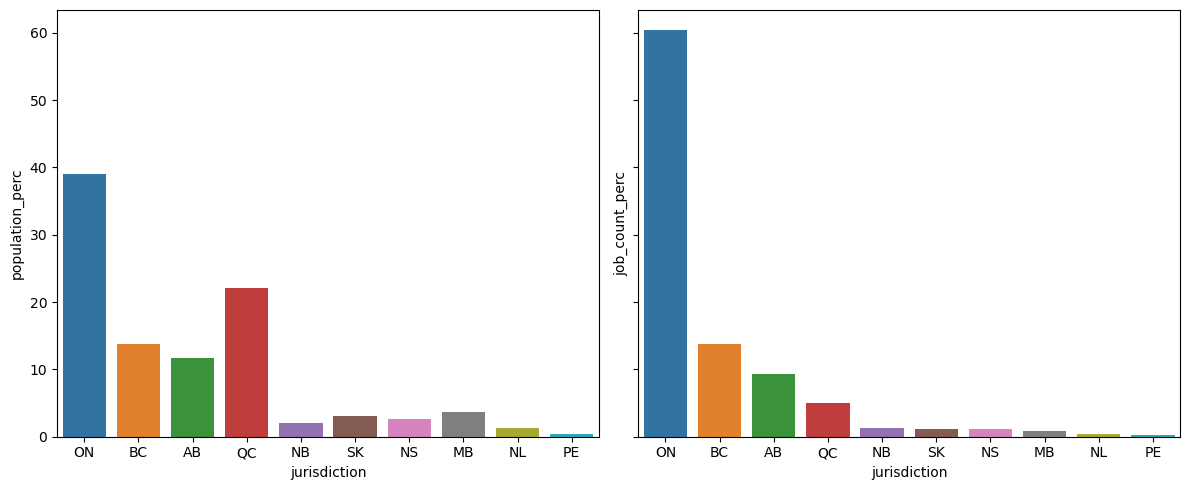

In [19]:
fig, axes = plt.subplots(1,2, figsize = (12,5), sharey=True)

sns.barplot(data = population_merged, x = population_merged.index, y = 'population_perc', ax=axes[0])

sns.barplot(data = population_merged, x = population_merged.index, y = 'job_count_perc', ax=axes[1])

plt.tight_layout()

plt.show()

In [20]:
population_merged.head()

,job_count_perc,population_perc
jurisdiction,,
ON,60.378440,38.989374
BC,13.761468,13.770905
AB,9.288991,11.735989
QC,4.988532,22.079680
NB,1.261468,2.079345


Text(0.5, 1.0, 'Comparison of Provincal Population (%) to Provincal Jobs Found (%)')

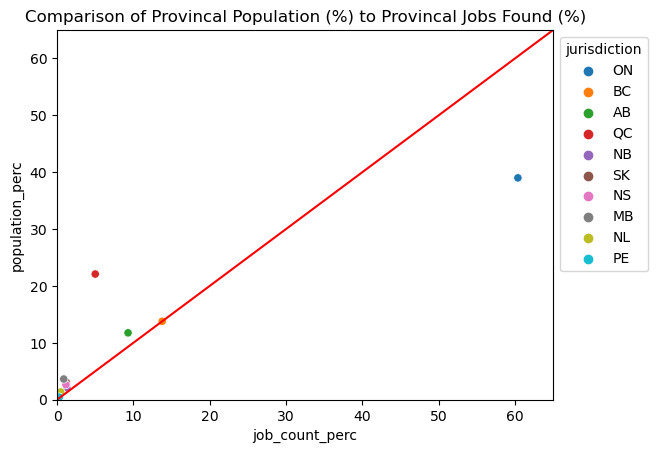

In [21]:
sns.scatterplot(data = population_merged, x='job_count_perc', y='population_perc', hue = population_merged.index)

axis_lim = 65

plt.xlim(0,axis_lim)
plt.ylim(0,axis_lim)

plt.plot([0,axis_lim], [0,axis_lim], color = 'red')

plt.legend(title='jurisdiction', bbox_to_anchor=(1, 1), loc='upper left')

plt.title(label="Comparison of Provincal Population (%) to Provincal Jobs Found (%)")


Was interested in the distribution of jobs found and what may be causing the difference between the number of jobs available in different provinces. Compared to the population distribution in provinces (named jurisdictions here) within the country first. This does explain a lot of the distribution of the jobs - provinces that fall near the diagonal line are close in terms of jobs found compared to relative province population. Ones that are higher than the line indicate a higher populaion relative to jobs found and vice versa for the jobs that fall below the diagonal line. There are a couple notable points that fall far from the line - Quebec and Ontario. 

Quebec has a relatively higher population relative to jobs found. Intuitively, this is likely due to the languauge of search being English and the primary language in Quebec being French. Some of this difference may be made up by Ontario. But regardless, Ontario seems to have a larger proportion of jobs relative to other provinces even ater accounting for population numbers. 

In [22]:
jobs_jurisdiction_salary_grouped =pd.DataFrame(jobs[jobs['jurisdiction']!='Not Specified'].groupby(by=['jurisdiction', 'salary_provided']).size(), columns=['job_count']).reset_index().sort_values('job_count', ascending=False)

jobs_jurisdiction_salary_grouped

,jurisdiction,salary_provided,job_count
12,ON,n,749
13,ON,y,304
3,BC,y,170
0,AB,n,89
1,AB,y,73
16,QC,n,73
2,BC,n,70
17,QC,y,14
10,NS,n,13
6,NB,n,13


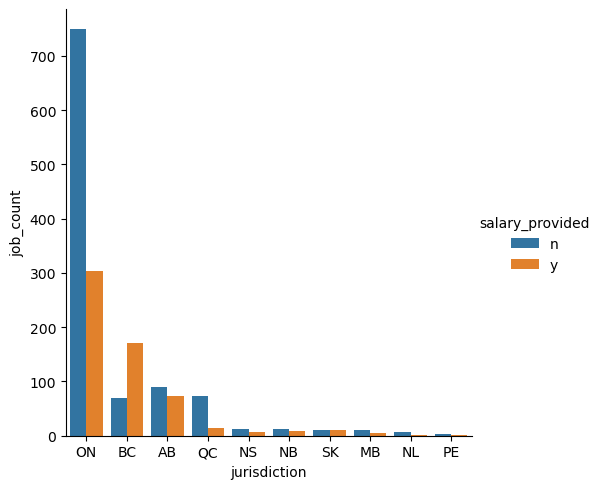

In [23]:
sns.catplot(data=jobs_jurisdiction_salary_grouped, kind = 'bar', 
            x = 'jurisdiction', 
            y = 'job_count',
            hue = 'salary_provided'
            )

Interestingly, although Ontario has a lot of job openings, they have a proportionally low number of jobs where the salaries are actually provided in the listings. BC stands out here being the only province with more jobs with salaries provided than not - and by a substantial margin as well. 

In [24]:
jobs_salaries = pd.read_sql(""" Select
t1.id, t1.job_title, t1.company, t1.location, t2.salary_type, t2.salary_period, t2.expected, t2.floor, t2.ceiling 
FROM Jobs t1 INNER JOIN Salaries t2 ON t1.id = t2.id""", 
engine, index_col='id')

In [25]:
jobs_salaries.head()

,job_title,company,location,salary_type,salary_period,expected,floor,ceiling
id,,,,,,,,
cdc658d9990a63fc,Data Analyst (Banking Projects) - up to $62.00...,CorGTA Inc.,"Hybrid remote in Toronto, ON",range,hourly,61.00,60.00,62.00
1079d92e140e0d7f,Data Visualization Engineer,Motorola Solutions,"Remote in Markham, ON",range,yearly,75000.00,70000.00,80000.00
fbaa0c742c9095f4,Senior Data Analyst,Basis Technologies,"Remote in Toronto, ON",range,yearly,114000.00,84000.00,144000.00
edb18d98d48fef48,Data Analyst,ATW International Inc.,"York, ON",range,yearly,69826.00,40740.00,98912.00
6e63fd5ee73b1053,Data Developer and Analyst,Loyalist College,"Remote in Belleville, ON",range,hourly,44.39,41.12,47.67


In [26]:
jobs_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634 entries, cdc658d9990a63fc to 5ff5ef584a4675c9
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job_title      634 non-null    object 
 1   company        634 non-null    object 
 2   location       634 non-null    object 
 3   salary_type    634 non-null    object 
 4   salary_period  634 non-null    object 
 5   expected       591 non-null    float64
 6   floor          424 non-null    float64
 7   ceiling        401 non-null    float64
dtypes: float64(3), object(5)
memory usage: 44.6+ KB


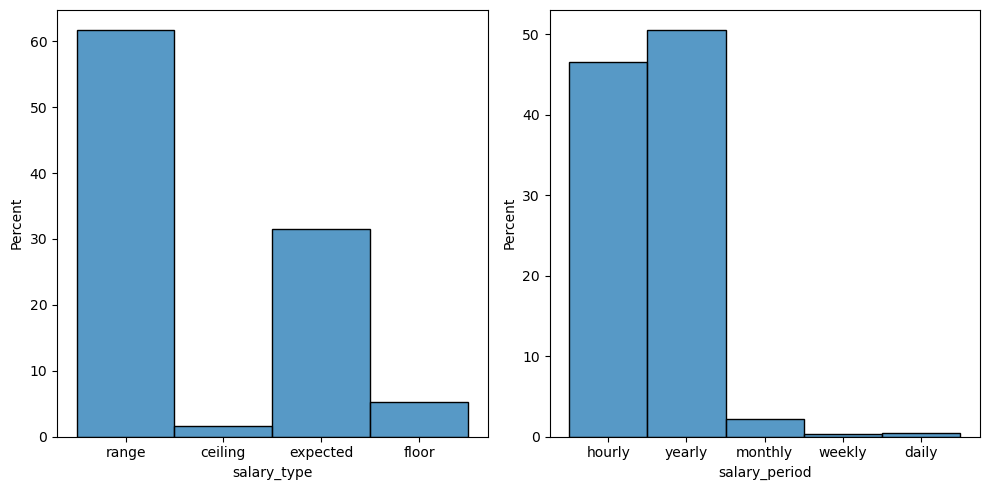

In [27]:
fig, axes = plt.subplots(1,2, figsize = (10,5))

sns.histplot(data = jobs_salaries, x = 'salary_type', stat = 'percent', ax = axes[0])

sns.histplot(data = jobs_salaries, x = 'salary_period', stat = 'percent', ax = axes[1])

plt.tight_layout()

The left plot shows that most of the jobs have a 'range' or an 'expected' salary type. Range, as the name suggests represents situations in which a salary range is provided in the job posting (ie. $30,000 - $40,000). The expected represents situations in which only a single salary value is provided. Floor and ceiling depict situations where job postings provide a single salary value, but also indicate that the value given represents the minimum salary value for the role (ie. "From $30,000) or the maximum salary value for the role (ie. "Up to $40,000). 

It is important to account for these situational differences in values provided to ensure comparisons are done on equal terms. In this analysis, an assumption is made that the range salary provided can be linerally interpolated between it's minimum and maximum values to provide a relatively accurate expected salary value. 

There are other assumptions that can be made related to the floor and ceiling salary values to try and approximate an expected value. However, such methods would would introduce additional approximation errors. Due to this and the fact that the ceiling and floor salary types represent a relatively small part of the total dataset (<10%), further analysis that compare different salaries will focus on the range and expected salary types only. 



The right plot shows that the majority of jobs with salaries provided do so at an hourly or yearly period. Similarily, since the monthly, weekly and daily periods are very rare (<5%), the remaining analysis focuses on the heavy hitters instead.  

In [28]:
jobs_salaries_keywords

job_title  \
id               keyword                                                                    
cdc658d9990a63fc data analyst           Data Analyst (Banking Projects) - up to $62.00...   
1079d92e140e0d7f data analyst                                 Data Visualization Engineer   
fbaa0c742c9095f4 business intelligence                                Senior Data Analyst   
                 data analyst                                         Senior Data Analyst   
                 data scientist                                       Senior Data Analyst   
...                                                                                   ...   
df371ae7cd519467 data analyst                                     Senior Business Analyst   
42fca608543f23d7 data scientist                        Software Engineer–Machine Learning   
2a07a1ed1249695e business intelligence                         Human Resources Generalist   
6d4df9162ee64e2b business intelligence    Bilingual: HR Manager / Human Resources Manager   
5ff5ef584a4675c9 business intelligence  Jr. Business & Systems Integration Analyst (We...   

                                                        company  \
id               keyword                                          
cdc658d9990a63fc data analyst                       CorGTA Inc.   
1079d92e140e0d7f data analyst                Motorola Solutions   
fbaa0c742c9095f4 business intelligence       Basis Technologies   
                 data analyst                Basis Technologies   
                 data scientist              Basis Technologies   
...                                                         ...   
df371ae7cd519467 data analyst                 Dawn InfoTek Inc.   
42fca608543f23d7 data scientist                         Workday   
2a07a1ed1249695e business intelligence        The Family Centre   
6d4df9162ee64e2b business intelligence  IS2 Workforce Solutions   
5ff5ef584a4675c9 business intelligence         Plexxis Software   

                                                            location  \
id               keyword                                               
cdc658d9990a63fc data analyst           Hybrid remote in Toronto, ON   
1079d92e140e0d7f data analyst                  Remote in Markham, ON   
fbaa0c742c9095f4 business intelligence         Remote in Toronto, ON   
                 data analyst                  Remote in Toronto, ON   
                 data scientist                Remote in Toronto, ON   
...                                                              ...   
df371ae7cd519467 data analyst                            Toronto, ON   
42fca608543f23d7 data scientist                        Vancouver, BC   
2a07a1ed1249695e business intelligence                  Edmonton, AB   
6d4df9162ee64e2b business intelligence                   Toronto, ON   
5ff5ef584a4675c9 business intelligence                  Victoria, BC   

                                       salary_type salary_period  expected  \
id               keyword                                                     
cdc658d9990a63fc data analyst                range        hourly      61.0   
1079d92e140e0d7f data analyst                range        yearly   75000.0   
fbaa0c742c9095f4 business intelligence       range        yearly  114000.0   
                 data analyst                range        yearly  114000.0   
                 data scientist              range        yearly  114000.0   
...                                            ...           ...       ...   
df371ae7cd519467 data analyst                range        hourly      85.0   
42fca608543f23d7 data scientist           expected        yearly  112500.0   
2a07a1ed1249695e business intelligence       range        yearly   69229.5   
6d4df9162ee64e2b business intelligence       range        yearly   97500.0   
5ff5ef584a4675c9 business intelligence       range        yearly   81350.0   

                                          floo

In [29]:
jobs_salaries_keywords_hourly = jobs_salaries_keywords[jobs_salaries_keywords['salary_period'] == 'hourly']
jobs_salaries_keywords_yearly = jobs_salaries_keywords[jobs_salaries_keywords['salary_period'] == 'yearly']

<Axes: xlabel='expected', ylabel='Count'>

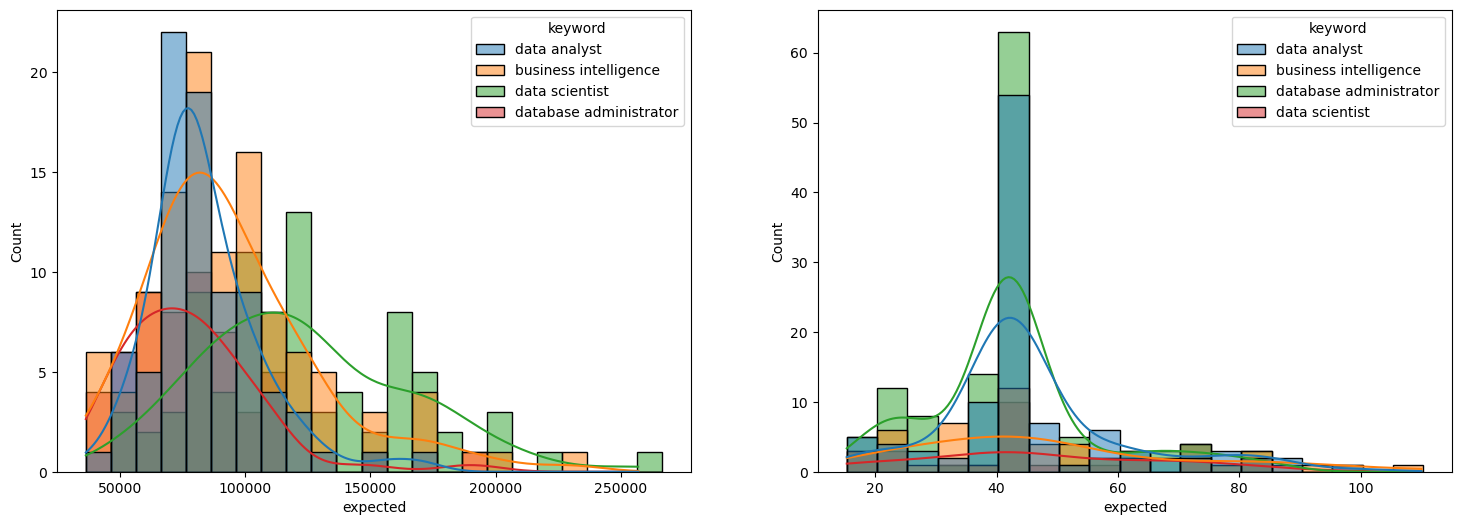

In [50]:
fig, axes = plt.subplots(1,2, figsize = (18,6))

sns.histplot(
    data = jobs_salaries_keywords[jobs_salaries_keywords['salary_period']=='yearly'], x='expected', hue = 'keyword', kde = True, binwidth = 10000, ax=axes[0])

sns.histplot(
    data = jobs_salaries_keywords[jobs_salaries_keywords['salary_period']=='hourly'], x='expected', hue = 'keyword', kde = True, binwidth = 5, ax=axes[1])

<Axes: xlabel='keyword', ylabel='expected'>

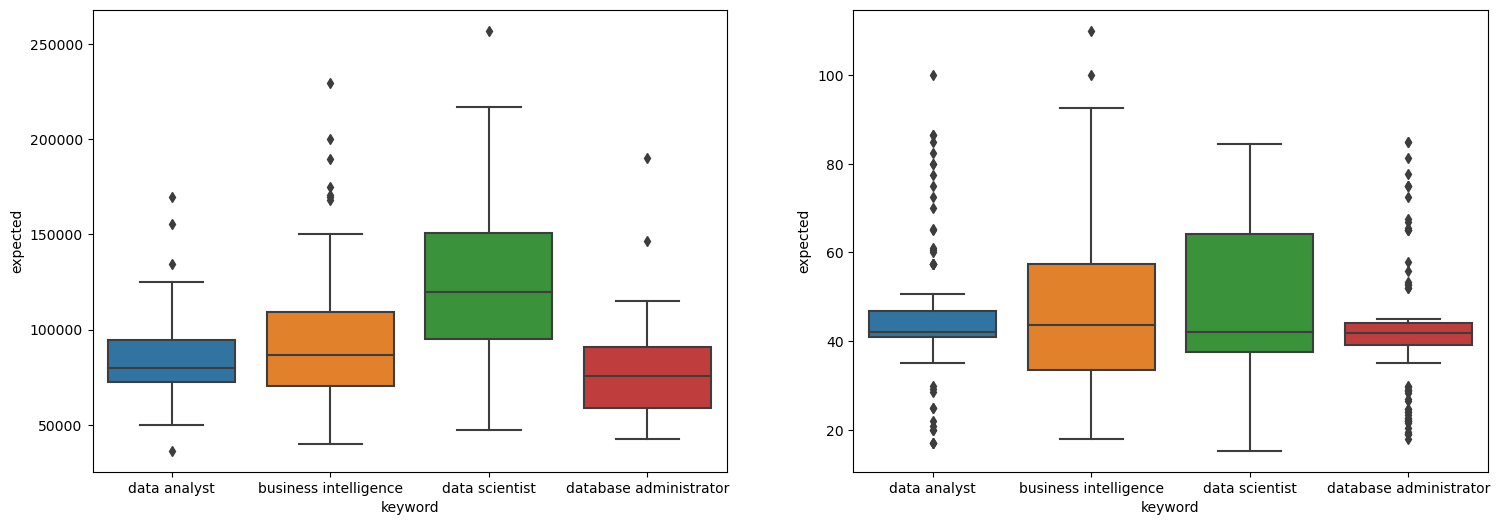

In [47]:
fig, axes = plt.subplots(1,2, figsize=(18,6))

x_order = jobs_salaries_keywords[jobs_salaries_keywords['salary_period']=='yearly'].reset_index()['keyword'].unique()

sns.boxplot(data = jobs_salaries_keywords[jobs_salaries_keywords['salary_period']=='yearly'].reset_index(), x='keyword', y='expected', ax=axes[0], order=x_order)

sns.boxplot(data = jobs_salaries_keywords[jobs_salaries_keywords['salary_period']=='hourly'].reset_index(), x='keyword', y='expected', ax=axes[1], order=x_order)